# Clustrring 
---
---

#### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px
import plotly

import plotly.graph_objects as go
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score

In [2]:
# Load data
df = pd.read_csv('data/customers_log.csv', index_col=0)

In [3]:
df.head()

income       age  years_with_bank  nbr_children  marital_status_1  \
0  0.154185  0.184312         0.408539      0.258591                 0   
1 -0.726524  1.493070        -1.087435     -0.648298                 0   
2 -0.188366 -0.234490         1.530520     -0.648298                 1   
3  1.123798  0.603115        -0.339448     -0.648298                 1   
4  0.983479  0.864867         1.904514      1.165479                 0   

   marital_status_2  marital_status_3  marital_status_4  
0                 1                 0                 0  
1                 1                 0                 0  
2                 0                 0                 0  
3                 0                 0                 0  
4                 0                 0                 1

#### Clustering

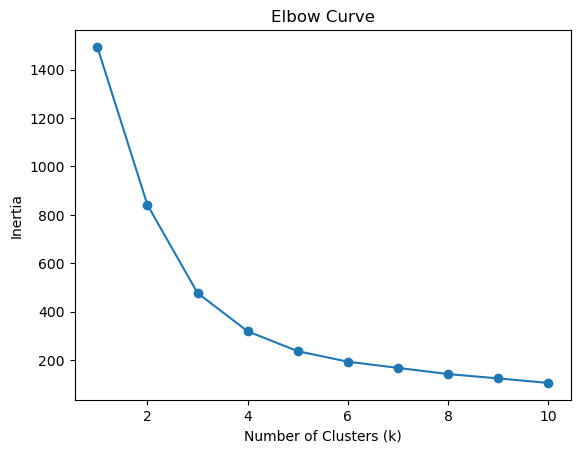

In [4]:
# # Test for number of clusters using the elbow method
X = df[['age','income']]

inertia = []
k_values = range(1, 11)  # Testing k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [5]:
#Test for number of clusters using the shilouette method
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    label=kmeanModel.predict(X)
    silhouettes.append(silhouette_score(X,label))

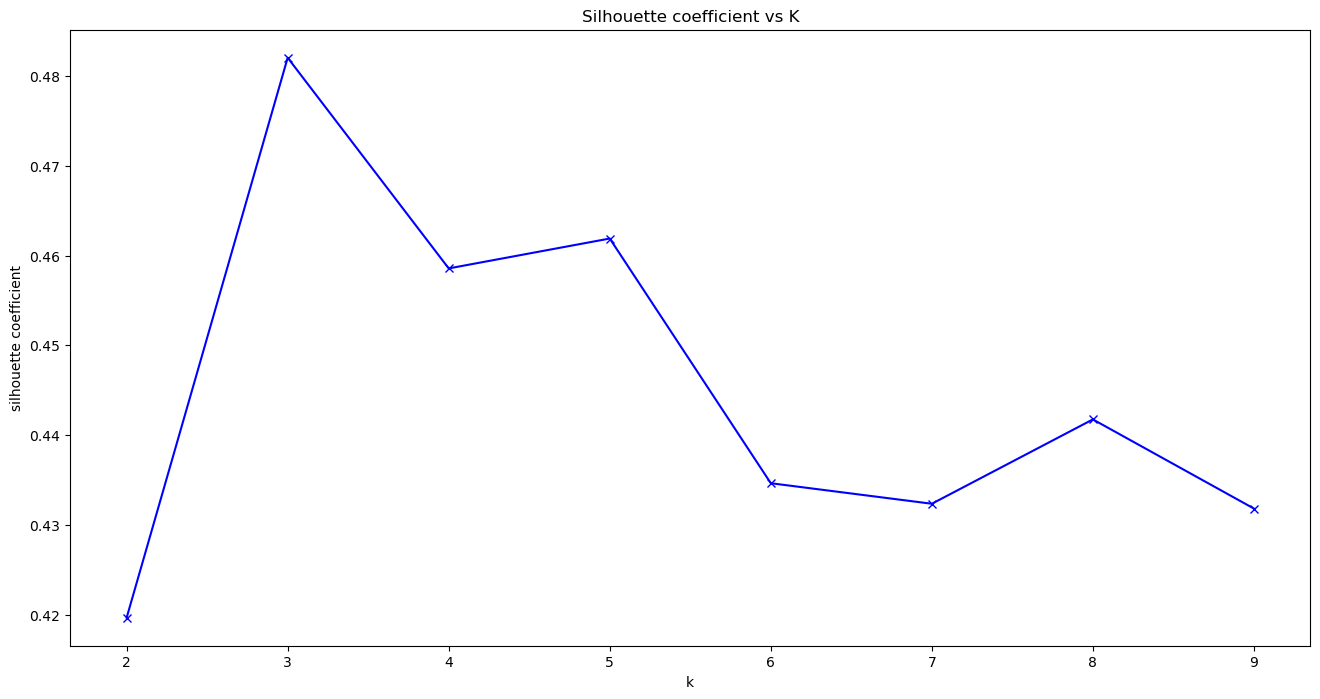

In [6]:
# plot the silhouettes
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [7]:
# plot cluster function 
def plot_clusters(X, y_res, plt_cluster_centers=False):
    # create scatter plot for samples from each cluster
    X_centroids = []
    for cluster in set(y_res):
        indices = np.where(y_res == cluster)[0]
        x = X.iloc[indices, 0]
        y = X.iloc[indices, 1]
        X_centroids.append(np.mean(x))
        plt.scatter(x, y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
                    
    
    # plot cluster centers (centroids)
    if plt_cluster_centers:
        centroids_x = X_centroids
        centroids_y = [np.mean(X.iloc[np.where(y_res == cluster)[0], 1]) for cluster in set(y_res)]
        plt.scatter(centroids_x, centroids_y, marker='*', color='black', label='Centroids', s=100)
    

    plt.legend()
    #plt.label()
    plt.grid()
    plt.show()

In [8]:
# import kmeans from sklearn
from sklearn.cluster import KMeans

In [9]:
# Fit the model

km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(X)

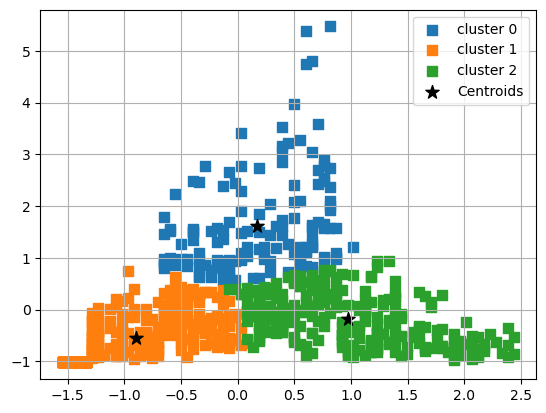

In [10]:
plot_clusters(X, y_km, plt_cluster_centers= True)

#### Radar charts

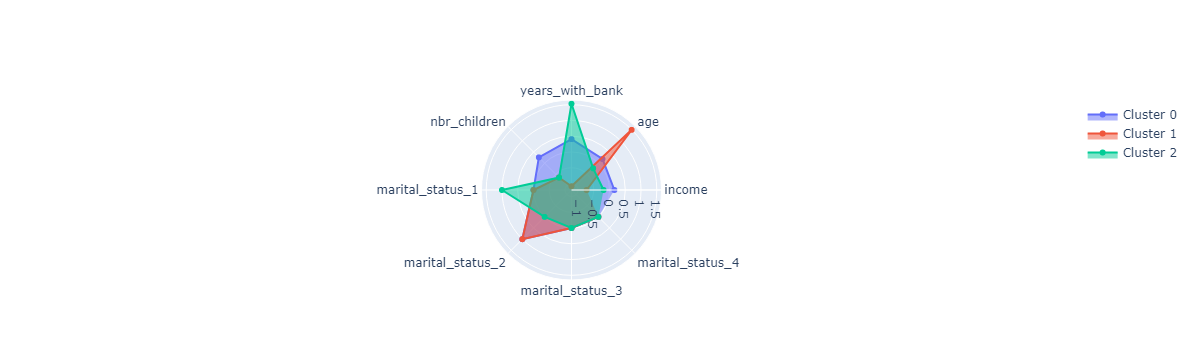

In [11]:
#Radar plot

#Plot features (columns) as theta (angle). Use the data grouped by the clusters
angle = df.columns

# 3: Initialize plot/figure
chart = go.Figure()

# Loop over each cluster 
for i in range(3):
    # Select column values in df_scaled
    radius = df.loc[i].values

# Plot values
    chart .add_trace(go.Scatterpolar
        (r = radius,
        theta = angle,
        fill = "toself",
        name = f'Cluster {i}'
            )
        )
# Add labels etc
chart.update_layout(
    polar=dict (  radialaxis = dict (visible = True)  ),
    showlegend=True
        )

chart.show()


In [12]:
# plot radar plot for each cluster
def plot_radar(df, cluster):
    # Plot features (columns) as theta (angle). Use the data grouped by the clusters
    
    angle = df.columns

    # Initialize plot/figure
    chart = go.Figure()

    # Select column values in df_scaled
    radius = df.loc[cluster].values

    # Plot values
    chart.add_trace(go.Scatterpolar
        (r = radius,
        theta = angle,
        fill = "toself",
        name = f'Cluster {cluster}'
            )
        )

    # Add labels etc
    chart.update_layout(
        polar=dict (  radialaxis = dict (visible = True)  ),
        showlegend=True
        )

    chart.show()

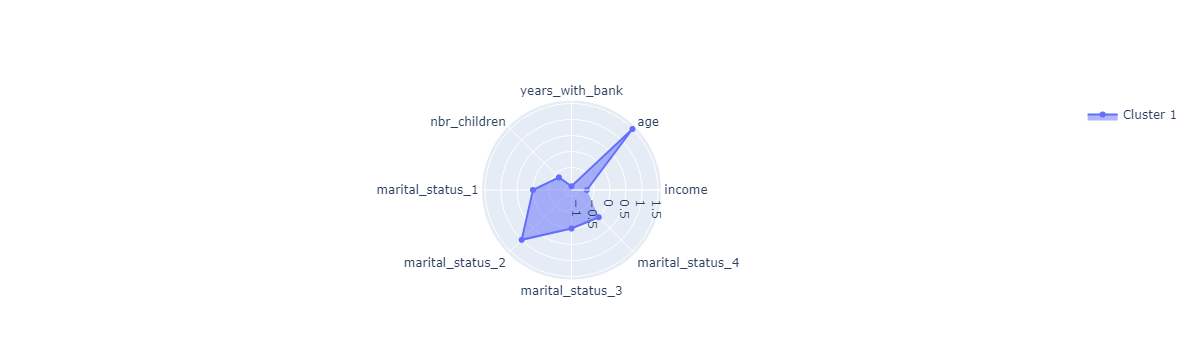

In [13]:
# plot radar plot for each cluster
plot_radar(df, 1)

### Principal Component Analysis (PCA)

In [14]:
# Reduce dimensionality with PCA to 4 components and plot the clusters in seaborn
pca = PCA(n_components=None)
dfx_pca = pca.fit(df)

# Visualize PCA components


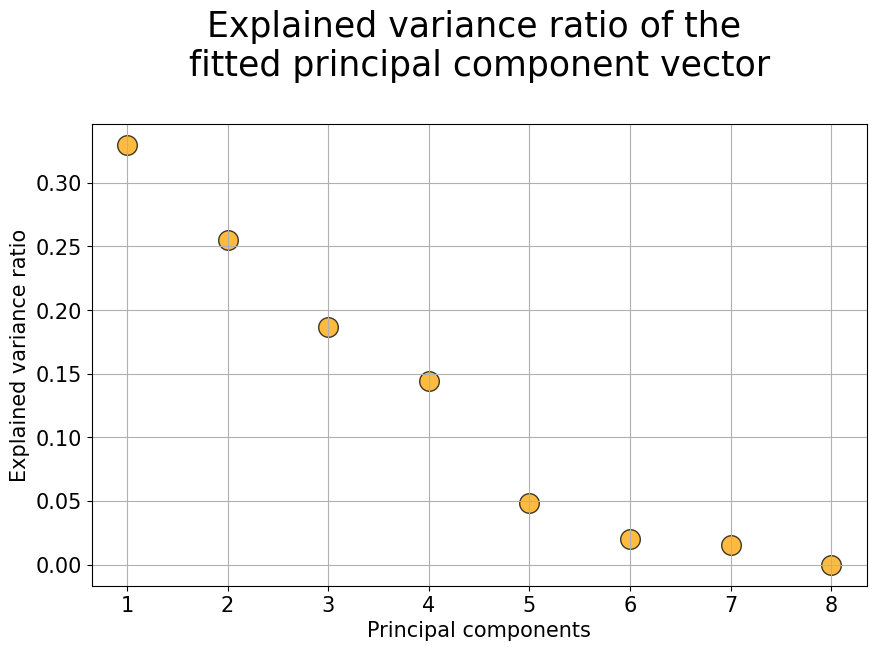

In [15]:
# plot explianed variance ratio
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()


In [16]:
# print explained variance ratio
pca.explained_variance_ratio_

array([3.29901854e-01, 2.55194294e-01, 1.86738471e-01, 1.44523374e-01,
       4.83207053e-02, 1.98503005e-02, 1.54710012e-02, 5.57605276e-34])

In [17]:
df.head()

income       age  years_with_bank  nbr_children  marital_status_1  \
0  0.154185  0.184312         0.408539      0.258591                 0   
1 -0.726524  1.493070        -1.087435     -0.648298                 0   
2 -0.188366 -0.234490         1.530520     -0.648298                 1   
3  1.123798  0.603115        -0.339448     -0.648298                 1   
4  0.983479  0.864867         1.904514      1.165479                 0   

   marital_status_2  marital_status_3  marital_status_4  
0                 1                 0                 0  
1                 1                 0                 0  
2                 0                 0                 0  
3                 0                 0                 0  
4                 0                 0                 1

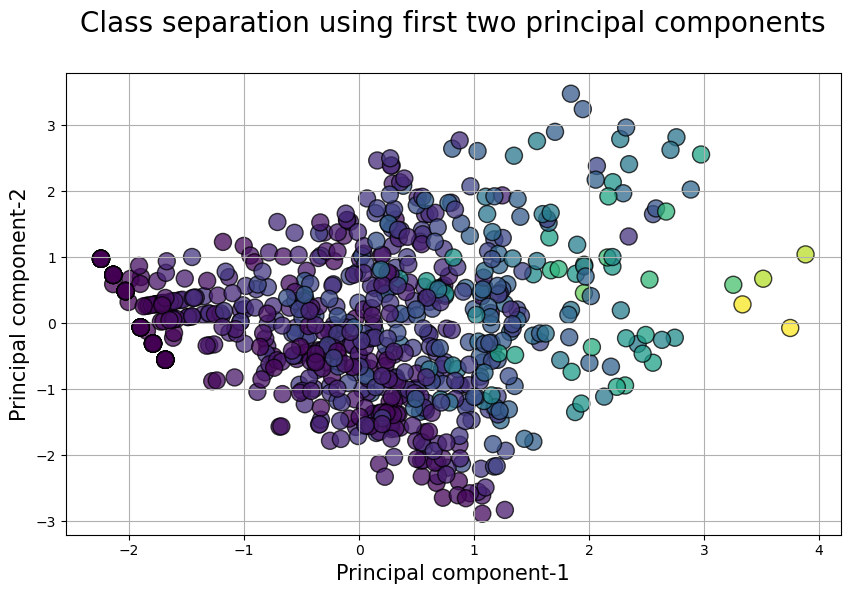

In [18]:
dfx_trans = pca.transform(df)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['income'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

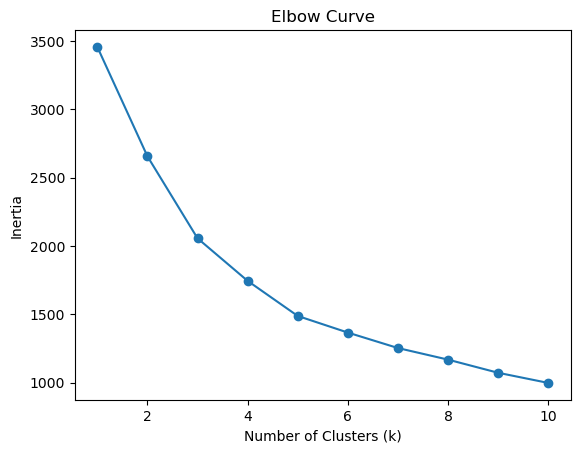

In [19]:
# Using PCA out put to figure out how many clusters we weed.
#1. Elbow method 

inertia = []
k_values = range(1, 11) 
T = pca.transform(df) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(T)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [20]:
# 2. Checking silhouette score
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(T)
    label=kmeanModel.predict(T)
    silhouettes.append(silhouette_score(T,label))

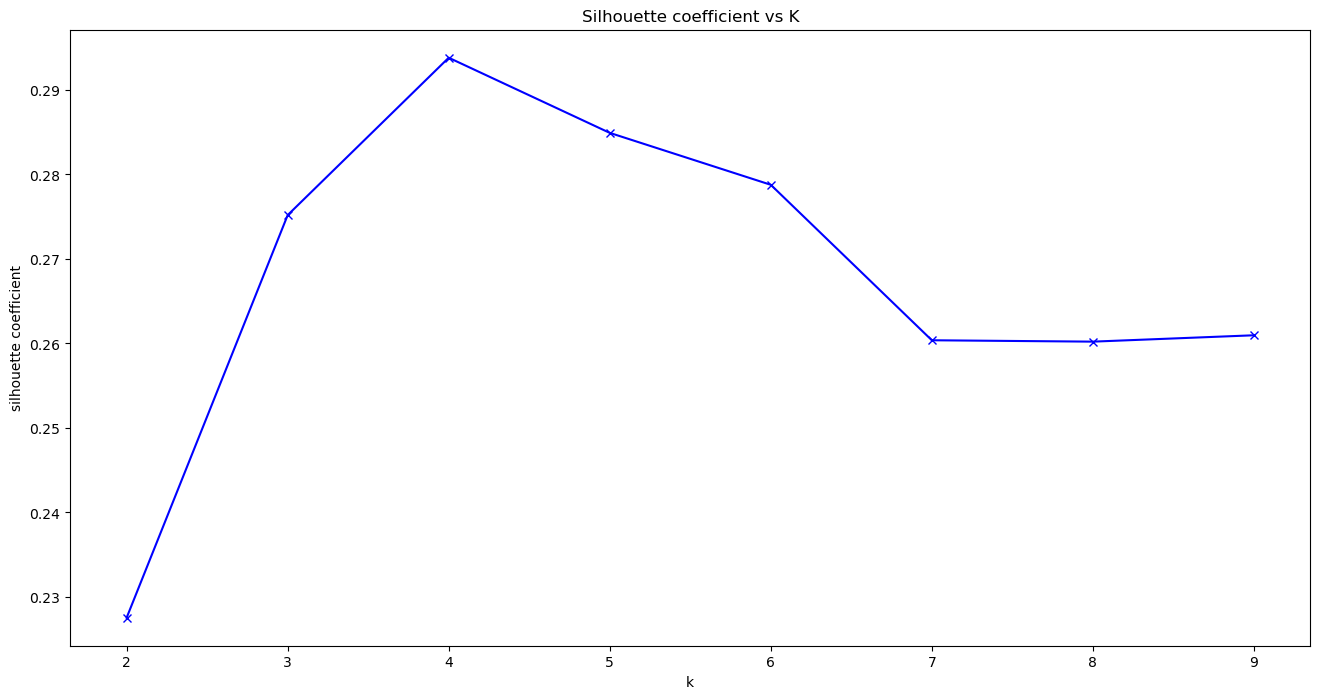

In [21]:
# plot the silhouettes
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [22]:
# PCA and K-means
model = KMeans(4)
model.fit(df)

KMeans(n_clusters=4)

In [23]:
# create df with original features and predicted clusters
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = model.predict(df)
df_with_clusters.head()

income       age  years_with_bank  nbr_children  marital_status_1  \
0  0.154185  0.184312         0.408539      0.258591                 0   
1 -0.726524  1.493070        -1.087435     -0.648298                 0   
2 -0.188366 -0.234490         1.530520     -0.648298                 1   
3  1.123798  0.603115        -0.339448     -0.648298                 1   
4  0.983479  0.864867         1.904514      1.165479                 0   

   marital_status_2  marital_status_3  marital_status_4  Cluster  
0                 1                 0                 0        3  
1                 1                 0                 0        3  
2                 0                 0                 0        1  
3                 0                 0                 0        0  
4                 0                 0                 1        0

In [24]:
# PCA with 2 components. 
pca = PCA(n_components=2).set_output(transform="pandas")
dfx_pca = pca.fit_transform(df)
dfx_pca.head()

pca0      pca1
0  0.596855 -0.148090
1  0.023662 -0.640189
2 -0.473136 -1.225460
3  0.358283 -0.320653
4  2.002555 -0.599354

In [25]:
df_pca_with_clusters = dfx_pca.copy()
df_pca_with_clusters['Cluster'] = df_with_clusters['Cluster']
df_pca_with_clusters.head()

pca0      pca1  Cluster
0  0.596855 -0.148090        3
1  0.023662 -0.640189        3
2 -0.473136 -1.225460        1
3  0.358283 -0.320653        0
4  2.002555 -0.599354        0

In [26]:
#to visuilize centroids in PCA space, we also need to transform them
pca_centroids = pca.transform(model.cluster_centers_)
pca_centroids

pca0      pca1
0  1.482041 -0.005435
1 -1.401543  0.144871
2  0.824013  1.286425
3  0.325465 -0.958567

##### Plot scatter

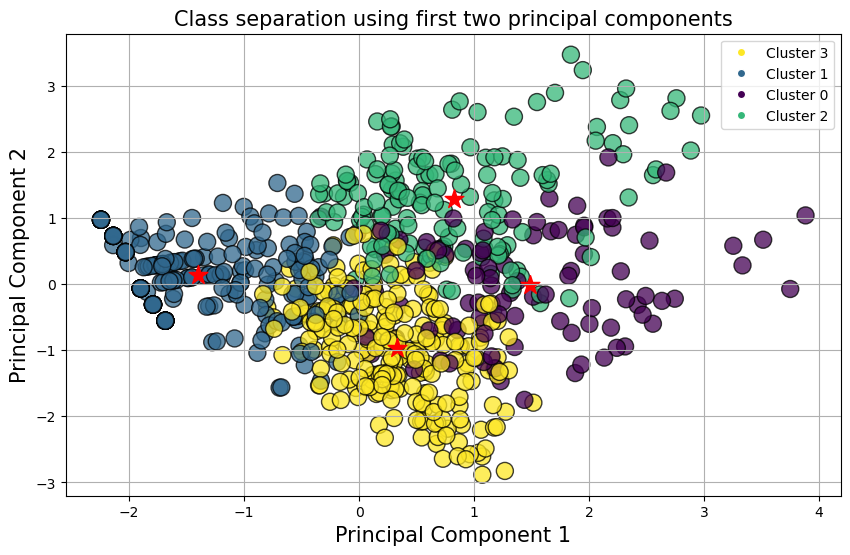

In [27]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca_with_clusters['pca0'], df_pca_with_clusters['pca1'], c=df_pca_with_clusters['Cluster'],edgecolors='k',alpha=0.75,s=150)
plt.scatter(pca_centroids['pca0'], pca_centroids['pca1'], marker='*', s=200, c='red')
plt.grid(True)
plt.title("Class separation using first two principal components", fontsize=15)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)

# Get unique cluster labels and their corresponding names
unique_clusters = df_pca_with_clusters['Cluster'].unique()
cluster_names = ['Cluster {}'.format(cluster_label) for cluster_label in unique_clusters]

# Create a custom legend using the scatter plot handles and labels
legend_elements = []
for cluster_label, cluster_name in zip(unique_clusters, cluster_names):
    # Get color for the current cluster label
    color = scatter.to_rgba(cluster_label)
    
    # Create a legend element with a colored marker and the cluster name
    legend_element = plt.Line2D([0], [0], marker='o', color='w', label=cluster_name, markerfacecolor=color)
    legend_elements.append(legend_element)

plt.legend(handles=legend_elements)

plt.show()

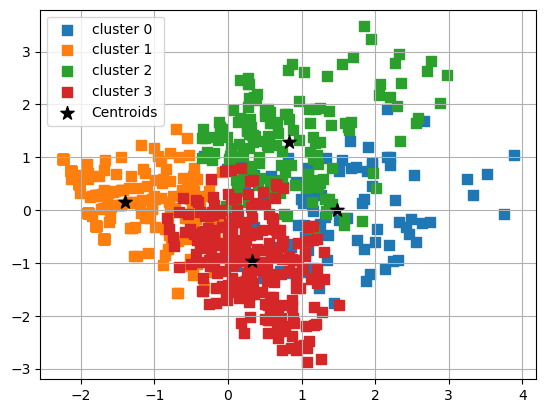

In [28]:
plot_clusters(df_pca_with_clusters, df_pca_with_clusters['Cluster'], plt_cluster_centers= True)

> If we want interpretability, we can use the mean (encoded) values of each feature in each cluster

In [29]:
# Mean values of each feature for each cluster
cluster_0_means = df[df_with_clusters['Cluster'] == 0].mean()
cluster_1_means = df[df_with_clusters['Cluster'] == 1].mean()
cluster_2_means = df[df_with_clusters['Cluster'] == 2].mean()
cluster_3_means = df[df_with_clusters['Cluster'] == 3].mean()

means = pd.DataFrame([cluster_0_means, cluster_1_means, cluster_2_means, cluster_3_means])
means

income       age  years_with_bank  nbr_children  marital_status_1  \
0  1.921230  0.372660         0.294715      0.012154          0.239130   
1 -0.633656 -1.021434        -0.170548     -0.556878          0.830645   
2  0.225390 -0.234822        -0.225830      1.607444          0.000000   
3 -0.221760  1.028645         0.204270     -0.469834          0.192771   

   marital_status_2  marital_status_3  marital_status_4  
0          0.554348          0.108696          0.097826  
1          0.120968          0.012097          0.036290  
2          0.670886          0.126582          0.202532  
3          0.666667          0.060241          0.080321

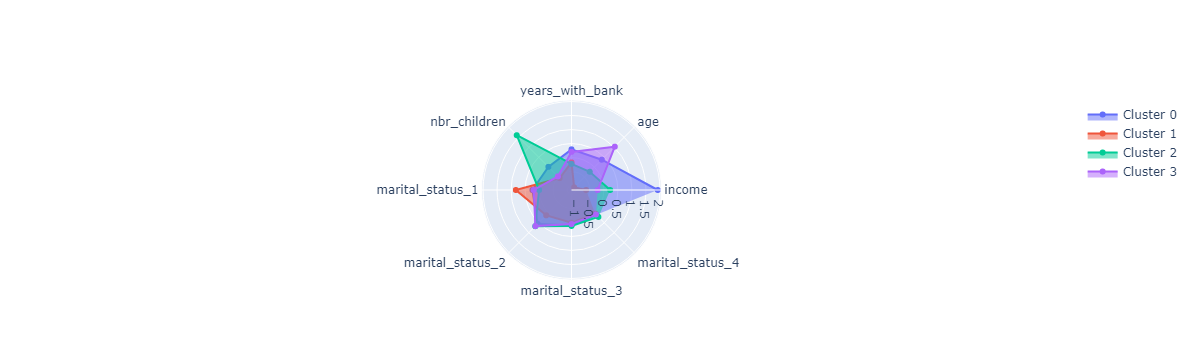

In [30]:
import plotly.graph_objects as go

means = pd.DataFrame([cluster_0_means, cluster_1_means, cluster_2_means, cluster_3_means])

fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=means.iloc[0], theta=means.columns, fill='toself', name='Cluster 0'))
fig.add_trace(go.Scatterpolar(r=means.iloc[1], theta=means.columns, fill='toself', name='Cluster 1'))
fig.add_trace(go.Scatterpolar(r=means.iloc[2], theta=means.columns, fill='toself', name='Cluster 2'))
fig.add_trace(go.Scatterpolar(r=means.iloc[3], theta=means.columns, fill='toself', name='Cluster 3'))

fig.update_layout()
fig.show()

In [31]:
principal_components = pca.components_
principal_components_df = pd.DataFrame(data=principal_components, columns=df.columns)

In [32]:
pca.components_

array([[ 0.60654086,  0.51958191,  0.21372925,  0.44027595, -0.27767139,
         0.20746555,  0.03266004,  0.0375458 ],
       [ 0.177588  , -0.50135119, -0.58381597,  0.60969068, -0.04197004,
        -0.0234176 ,  0.02569282,  0.03969482]])

In [33]:
principal_components_df.head()

income       age  years_with_bank  nbr_children  marital_status_1  \
0  0.606541  0.519582         0.213729      0.440276         -0.277671   
1  0.177588 -0.501351        -0.583816      0.609691         -0.041970   

   marital_status_2  marital_status_3  marital_status_4  
0          0.207466          0.032660          0.037546  
1         -0.023418          0.025693          0.039695

In [34]:
import seaborn as sns

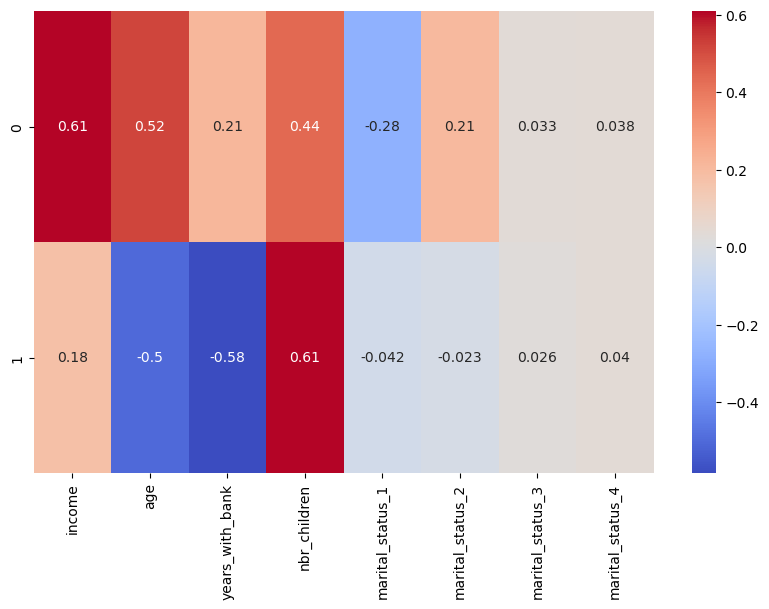

In [35]:
# plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(principal_components_df, cmap='coolwarm', annot=True)
plt.show()

In [36]:
def plot_clusters_(X,y_res,type_separation, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    edgecolors='k',alpha=0.75,s=150,
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
        
    plt.title('Class separation (' + str(type_separation) + ') using first two principal components\n',fontsize=20)
    plt.xlabel("Principal component-1",fontsize=15)
    plt.ylabel("Principal component-2",fontsize=15)
    plt.legend()
    plt.grid()
    plt.show()


In [37]:
pca.transform(df)

pca0      pca1
0    0.596855 -0.148090
1    0.023662 -0.640189
2   -0.473136 -1.225460
3    0.358283 -0.320653
4    2.002555 -0.599354
..        ...       ...
742 -0.075478 -0.131728
743  0.955269 -0.626996
744  1.665958  1.672843
745 -0.189370 -0.989910
746 -1.435202  0.385789

[747 rows x 2 columns]

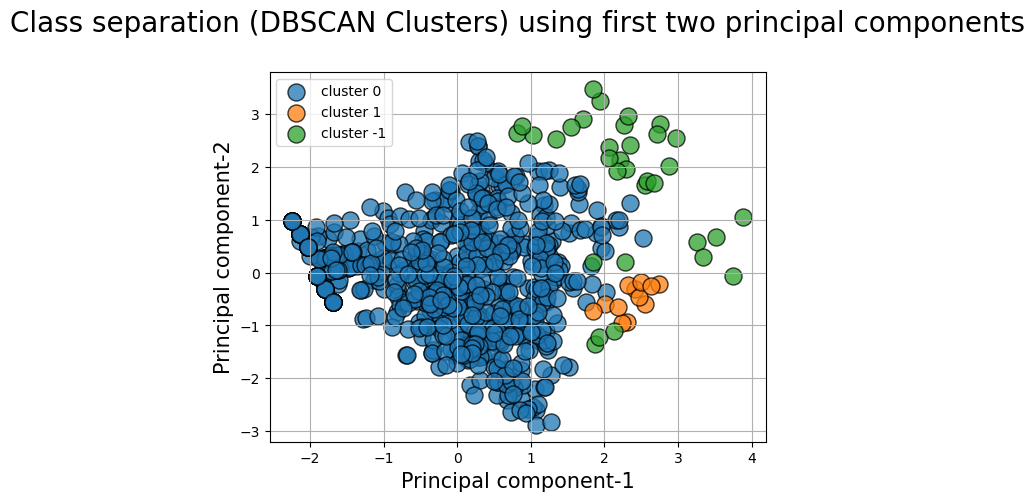

In [38]:
# Perform PCA
pca = PCA(n_components=2)
dfx_pca = pca.fit_transform(df)

# Perform DBSCAN clustering
db = DBSCAN(eps=0.4, min_samples=8, metric='euclidean')
clusters = db.fit_predict(dfx_pca)

# Plot DBSCAN clusters
plot_clusters_(dfx_pca, clusters, 'DBSCAN Clusters')

> With paramerters: min samples 8 and eps 0.4 and euclidian distance as metric. DBscan generated 3 clusters after PCA. These combination of parameters made the most sense visually.

>> `How do we know that this is the best clustering? Is there a formula to get the optimal parameters for the clustering with DBSCAN?`

### Plotting Raddar for DBSCAN

In [39]:
# Imports 
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

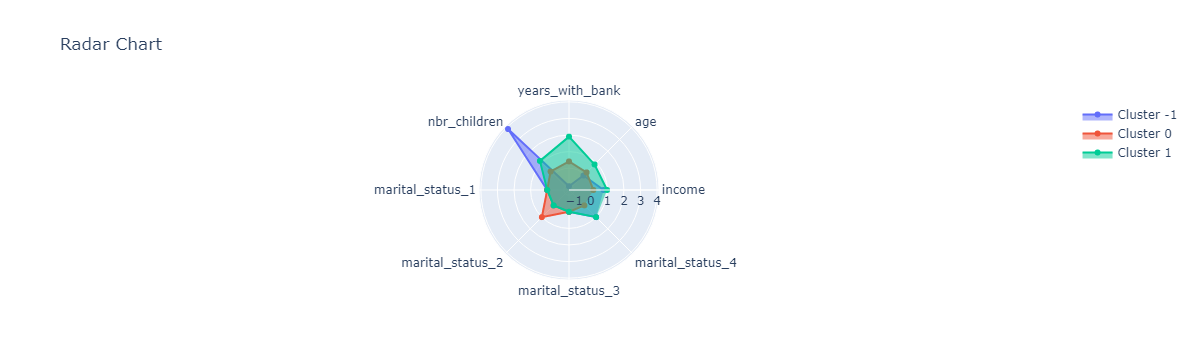

In [40]:
# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_features = pca.fit_transform(df)

# Perform clustering using DBSCAN
db = DBSCAN(eps=0.4, min_samples=8, metric='euclidean')
clusters = db.fit_predict(pca_features)

# Create a DataFrame to hold the principal components and cluster assignments
principal_components_df = pd.DataFrame(data=clusters, columns=['Cluster'])

# Plot features (columns) as theta (angle)
angle = df.columns

# Initialize plot/figure
chart = go.Figure()

n_clusters = len(set(db.labels_))
# Loop over each cluster
for i in range(n_clusters):
    # Select row indices for the current cluster
    cluster_labels = i-1
    cluster_indices = principal_components_df.index[principal_components_df['Cluster'] == cluster_labels]

    # Select row values in the original data for the current cluster
    cluster_data = df.loc[cluster_indices].values[0]

    # Plot values
    chart.add_trace(go.Scatterpolar(
        r=cluster_data,
        theta=angle,
        fill='toself',
        name=f'Cluster {cluster_labels}'
    ))

# Add labels etc
chart.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title='Radar Chart'
)

chart.show()

### Plotting Dendogram for Hireachial Clustering

In [41]:
import scipy.cluster.hierarchy as sch

In [42]:
# Cluster with Hierarchical clustering, plot dendrogram.
def plot_dendrogram(dataframe, method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(dataframe, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

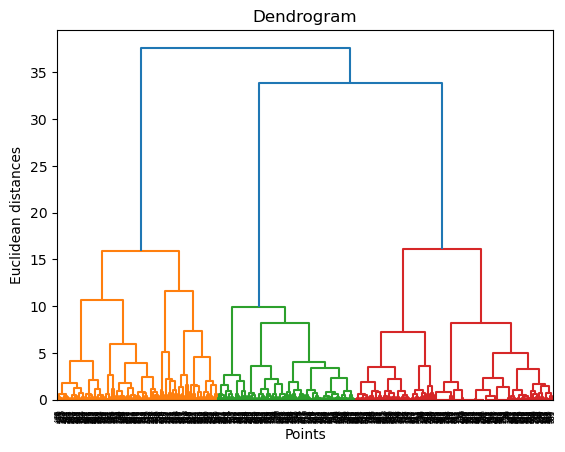

In [43]:
T = pca.fit_transform(df)
plot_dendrogram(T)

>> Dendogram shows three clusters as optimal after PCA

### Algrometrive clustering

In [44]:
# Algrometrive clustering
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

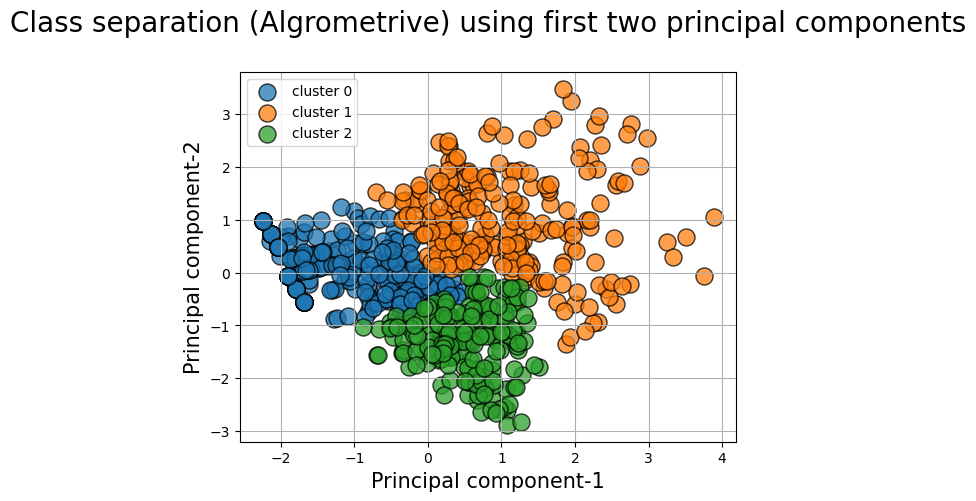

In [45]:
y_hc = ac.fit_predict(T)
plot_clusters_(T,y_hc, 'Algrometrive')

>> Algrometrive clustering with three clusters

### Rddar chart after Agglomerative Clustering

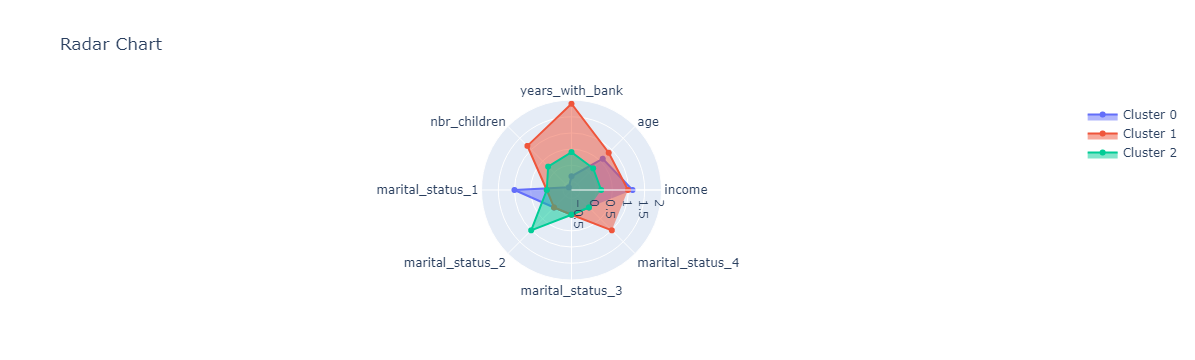

In [46]:
import pandas as pd
import plotly.graph_objects as go

# Perform dimensionality reduction using PCA
pca_features = pca.transform(df)

# Perform clustering using K-means
clusters = ac.fit_predict(pca_features)

# Create a DataFrame to hold the principal components and cluster assignments
principal_components_df = pd.DataFrame(data=clusters, columns=['Cluster'])

# Plot features (columns) as theta (angle)
angle = df.columns

# Initialize plot/figure
chart = go.Figure()

# Loop over each cluster
for i in range(ac.n_clusters):
    # Select row indices for the current cluster
    cluster_indices = principal_components_df.index[principal_components_df['Cluster'] == i]

    # Select row values in the original data for the current cluster
    cluster_data = df.loc[cluster_indices].values[0]

    # Plot values
    chart.add_trace(go.Scatterpolar(
        r = cluster_data,
        theta = angle,
        fill = "toself",
        name = f'Cluster {i}'
    ))

# Add labels etc
chart.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title='Radar Chart'
)

chart.show()
